# Manual PCA versus scikit-learn

<b> Import the pandas, numpy, and matplotlib plotting libraries and the scikit-learn PCA model </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

<b> Load the dataset and select only the kernel features as per the previous exercises. Display the first five rows of the data </b>

In [2]:
df = pd.read_csv('datasets/Seed_Data.csv')
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [3]:
df = df[['A', 'LK']]
df.head()

,A,LK
0,15.26,5.763
1,14.88,5.554
2,14.29,5.291
3,13.84,5.324
4,16.14,5.658


<b> Compute the covariance matrix for the data </b>

In [4]:
data = np.cov(df.T)
data

array([[8.46635078, 1.22470367],
       [1.22470367, 0.19630525]])

<b> Transform the data using the scikit-learn API and only the first principal component. Store the transformed data in the sklearn_pca variable </b>

In [5]:
model = PCA(n_components=1)
model.fit(data)

PCA(n_components=1)

In [6]:
sklearn_pca = model.fit_transform(df.values)
sklearn_pca

array([[ 0.42750141],
       [ 0.0214464 ],
       [-0.60018363],
       [-1.04079308],
       [ 1.28333164],
       [-0.49748453],
       [-0.16529652],
       [-0.75981283],
       [ 1.8249352 ],
       [ 1.61265346],
       [ 0.42047106],
       [-0.83640254],
       [-0.97481059],
       [-1.07793343],
       [-1.11708915],
       [-0.29467893],
       [-0.92175772],
       [ 0.81919204],
       [-0.2067646 ],
       [-2.16326594],
       [-0.67618271],
       [-0.74546517],
       [ 1.02028261],
       [-2.81486584],
       [ 0.18381837],
       [ 1.35792272],
       [-1.84212229],
       [-2.11922533],
       [-0.74245216],
       [-1.39921053],
       [-1.69510565],
       [ 0.6542609 ],
       [-0.73699336],
       [-0.90438032],
       [ 0.21235683],
       [ 1.27085587],
       [ 1.36681493],
       [ 2.23857105],
       [-0.04309129],
       [-0.59487165],
       [-1.33424576],
       [-1.37340147],
       [-1.74044425],
       [ 0.68137463],
       [ 0.25265366],
       [-1

<b> Transform the data using the manual PCA and only the first principal component. Store the transformed data in the manual_pca variable </b>

In [7]:
data2 = np.cov(df.T)
data2

array([[8.46635078, 1.22470367],
       [1.22470367, 0.19630525]])

In [8]:
eigenvectors, eigenvalues, _ = np.linalg.svd(data2, full_matrices=False)

In [9]:
eigenvalues

array([8.64390408, 0.01875194])

In [10]:
P2 = eigenvectors[0]
P2

array([-0.98965371, -0.14347657])

In [11]:
manual_pca = df.dot(P2)
manual_pca

0     -15.928971
1     -15.522916
2     -14.901286
3     -14.460677
4     -16.784801
         ...    
205   -12.800918
206   -11.851281
207   -13.814672
208   -12.459991
209   -12.924988
Length: 210, dtype: float64

<b> Plot the sklearn_pca and manual_pca values on the same plot to visualize the difference </b>

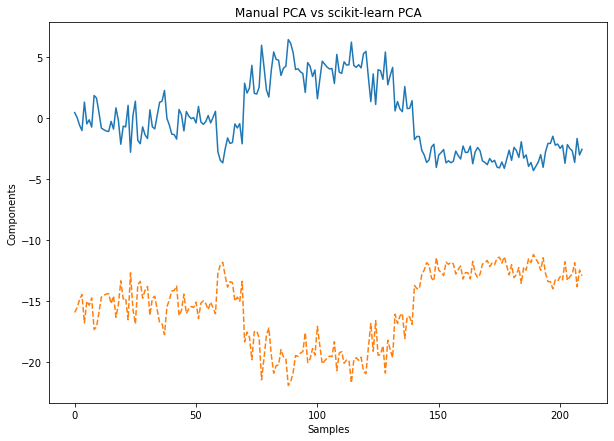

In [12]:
plt.figure(figsize=(10, 7))
plt.plot(sklearn_pca, label='Scikit-learn PCA')
plt.plot(manual_pca, label='Manual PCA', linestyle='--')
plt.title('Manual PCA vs scikit-learn PCA')
plt.xlabel('Samples')
plt.ylabel('Components')
plt.show()

<b> Notice that the two plots look almost identical, but with some key differences. What are these differences? </b>

In [13]:
# display scikit-learn PCA components
model.components_

array([[0.98965371, 0.14347657]])

In [14]:
# display manual PCA components
P2

array([-0.98965371, -0.14347657])

The only difference is the sign, but this is just a convention

<b> See whether you can modify the output of the manual PCA process to bring it in line with the scikit-learn version </b>

In [15]:
manual_pca = manual_pca * (-1)

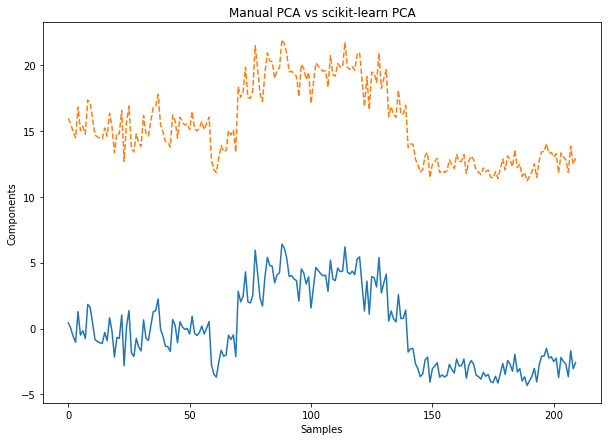

In [16]:
plt.figure(figsize=(10, 7))
plt.plot(sklearn_pca, label='Scikit-learn PCA')
plt.plot(manual_pca, label='Manual PCA', linestyle='--')
plt.title('Manual PCA vs scikit-learn PCA')
plt.xlabel('Samples')
plt.ylabel('Components')
plt.show()

The scikit-learn API subtracts the mean of the data prior to the transform. Let's subtract the mean of each column from the dataset before completing the transform with manual PCA

In [17]:
mean_vals = np.mean(df, axis=0)
offset_vals = df - mean_vals

In [18]:
manual_pca = offset_vals.dot(P2.T) * (-1)

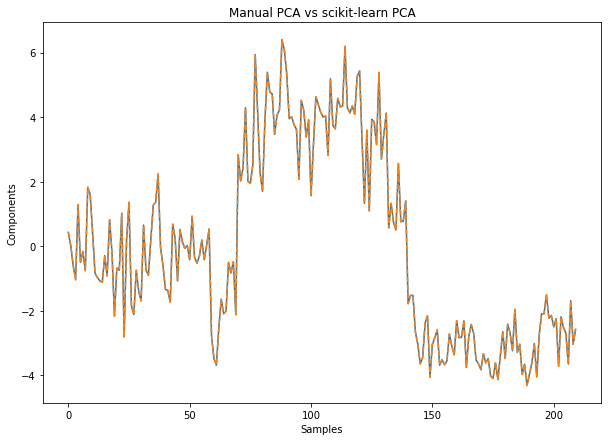

In [19]:
plt.figure(figsize=(10, 7))
plt.plot(sklearn_pca, label='Scikit-learn PCA')
plt.plot(manual_pca, label='Manual PCA', linestyle='--')
plt.title('Manual PCA vs scikit-learn PCA')
plt.xlabel('Samples')
plt.ylabel('Components')
plt.show()

# PCA Using the Expanded Seeds Dataset

In this activity, we are going to use the complete Seeds dataset to look at the effect of selecting a differing number of components in the PCA decomposition. This activity aims to simulate the process that is typically completed in a real-world problem as we try to determine the optimum number of components to select, attempting to balance the extent of dimensionality reduction and information loss.

<b> Import pandas and matplotlib. To enable 3D plotting, you will also need to import Axes3D </b>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<b> Read in the dataset and select the Area of Kernel, Length of Kernel, and Compactness of Kernel columns </b>

In [21]:
df = pd.read_csv('datasets/Seed_Data.csv')
df = df[['A', 'LK', 'C']]
df.head()

,A,LK,C
0,15.26,5.763,0.8710
1,14.88,5.554,0.8811
2,14.29,5.291,0.9050
3,13.84,5.324,0.8955
4,16.14,5.658,0.9034


<b> Plot the data in three dimensions </b>

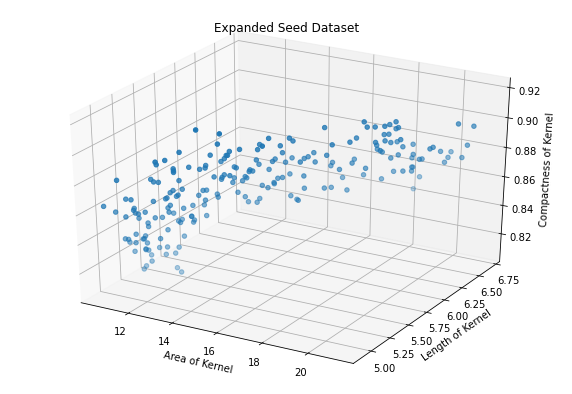

In [22]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['A'], df['LK'], df['C'])
ax.set_xlabel('Area of Kernel')
ax.set_ylabel('Length of Kernel')
ax.set_zlabel('Compactness of Kernel')
ax.set_title('Expanded Seed Dataset')
plt.show()

<b> Create a PCA model without specifying the number of components </b>

In [23]:
from sklearn.decomposition import PCA

In [24]:
model = PCA()

<b> Fit the model to the dataset </b>

In [25]:
model.fit(df)

PCA()

<b> Display the eigenvalues or explained_variance_ratio_ </b>

In [26]:
model.explained_variance_ratio_

array([9.97794495e-01, 2.19418709e-03, 1.13183333e-05])

<b> We want to reduce the dimensionality of the dataset but still keep at least 90% of the variance. What is the minimum number of components required to keep 90% of the variance? </b>

<b> Create a new PCA model, this time specifying the number of components required to keep at least 90% of the variance </b>

In [27]:
model = PCA(n_components=1)

In [28]:
model.fit(df)

PCA(n_components=1)

<b> Transform the data using the new model </b>

In [29]:
df_t = model.fit_transform(df.values)

<b> Plot the transformed data </b>

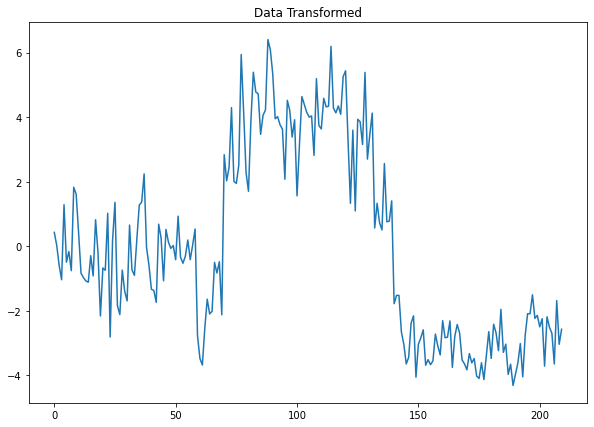

In [30]:
plt.figure(figsize=(10, 7))
plt.plot(df_t)
plt.title('Data Transformed')
plt.show()

<b> Restore the transformed data to the original dataspace </b>

In [31]:
data = model.inverse_transform(df_t)

<b> Plot the restored data in three dimensions in one subplot and the original data in a second subplot to visualize the effect of removing some of the variance </b>

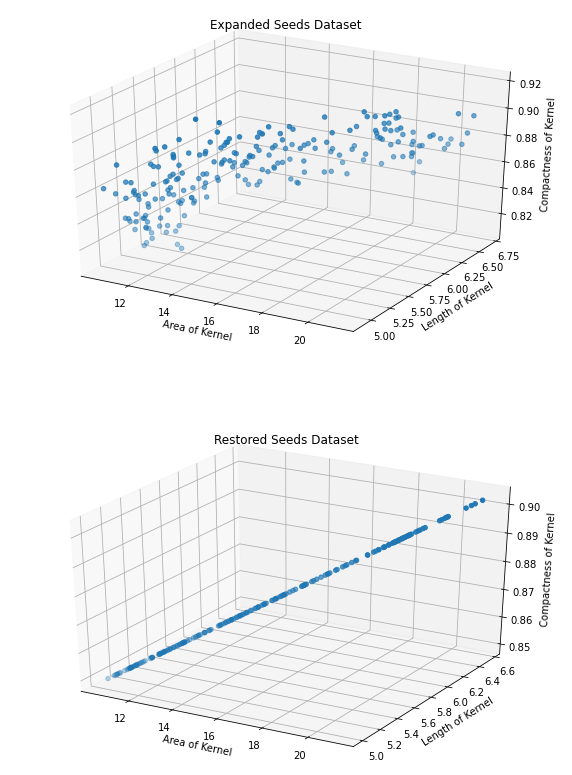

In [32]:
fig = plt.figure(figsize=(10, 14))
ax = fig.add_subplot(211, projection='3d')
ax.scatter(df['A'], df['LK'], df['C'], label='Original Data')
ax.set_xlabel('Area of Kernel')
ax.set_ylabel('Length of Kernel')
ax.set_zlabel('Compactness of Kernel')
ax.set_title('Expanded Seeds Dataset')
#####################################################
ax = fig.add_subplot(212, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], label='Restored Data')
ax.set_xlabel('Area of Kernel')
ax.set_ylabel('Length of Kernel')
ax.set_zlabel('Compactness of Kernel')
ax.set_title('Restored Seeds Dataset')
plt.show()